## Algoritmos de Aprendizaje - Aprendizaje Supervisado

>  Recordatorio:  Todos los modelos de aprendizaje supervisado en scikit-learn implementan un metodo llamado
`fit(X, y)`, que sirve para entrenar(ajustar) el modelo y un método llamado `predict(X_t)`, que devuelve predicciones sobre los valores `X_t`de acuerdo al modelo ya ajustado. 

* Dado que el dataset iris es pequeño, observaciones con relativamente pocos atributos... Con cuál algoritmo se podría empezar y por qué?

> "Often the hardest part of solving a machine learning problem can be finding the right estimator for the job."

> "Different estimators are better suited for different types of data and different problems."

<a href = "http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html" style = "float: right">-Choosing the Right Estimator from sklearn docs</a>


In [1]:
#  Se importan funcionalidades para compatibilidad entre python 2/3 

from __future__ import absolute_import, division, print_function, unicode_literals

# Para python 2, comente la siguiente linea:
from builtins import range

<b>Un estimador para reconocer un nuevo iris a partir de sus medidas (atributos)</b>

> O en lenguaje de machine learning,  ajustamos  (<i>fit</i>) un estimador sobre la muestra, dado sus atributos, para predecir (<i>predict</i>) la clase a la cuál un nuevo iris pertenece.

Empecemos! (Vamos a separar un pequeño % de la muestra y revisar las predicciones del modelo a construir contra estos datos separados)

In [2]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

# Cargando el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Se separan los datos en datos de entrenamiento y prueba usando la función rain_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Probemos con el método de clasificación conocido como árbol de decisión (decision tree)
from sklearn import tree

t = tree.DecisionTreeClassifier(max_depth = 4,
                                    criterion = 'entropy', 
                                    class_weight = 'balanced',
                                    random_state = 2)
t.fit(X_train, y_train) 

t.score(X_test, y_test) 

0.9333333333333333

In [10]:
# Cuáles son los valores ajustados(o predicciones) asociados a la partición seleccionada para prueba? 
y_pred = t.predict(X_test)
print(y_pred)

#Qué tal la predicción para la primera observación de la base de prueba?
print("Predición: %d, Etiqueta original: %d" % (y_pred[1], 1)) # <-- Llenar la casilla

[2 2 1 0 1 2 1 0 1 2 1 2 0 0 2 2 1 2 2 0 0 1 0 1 2 2 0 2 1 0 2 2 0 2 2 1 1
 1 0 2 1 0 2 2 1]
Predición: 2, Etiqueta original: 1


Nota: Más adelante se verá como evaluar los modelos. 

In [27]:
# Aquí una forma ágil de usar validación cruzada (útil para evaluación rápida de modelos!)
from sklearn import cross_validation

t = tree.DecisionTreeClassifier(max_depth = 4,
                                    criterion = 'entropy', 
                                    class_weight = 'balanced',
                                    random_state = 2)

# particiona, ajusta y predice todo de una vez con un score 
score = cross_validation.cross_val_score(t, X, y)
score

array([0.98039216, 0.92156863, 1.        ])

Preguntas:  Qué nos dicen estos scores?  Son muy altos o bajos?  Si es 1.0 qué significa?

### Cómo luce el gráfico para este árbol de decisión?  Es decir, cuáles son las "preguntas" y "decisiones" para este árbol...
* Nota:  Se necesita la aplicación Graphviz y el paquete de python `graphviz`.
* Para instalar ambos en OS X:
```
sudo port install graphviz
sudo pip install graphviz
```
* Para instalación general vea esta guía (http://graphviz.readthedocs.org/en/latest/manual.html)

1.0


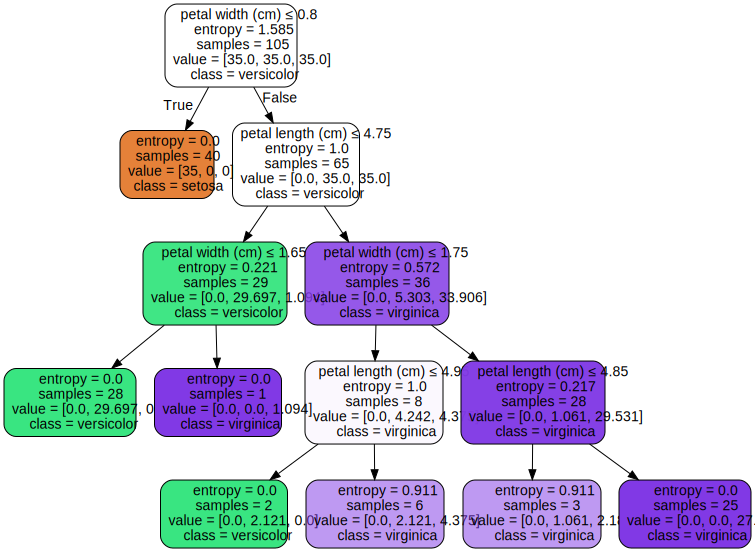

In [28]:
from sklearn.tree import export_graphviz
import graphviz

# Corramos de nuevo el clasificador de árbol de decisión
from sklearn import tree

t = tree.DecisionTreeClassifier(max_depth = 4,
                                    criterion = 'entropy', 
                                    class_weight = 'balanced',
                                    random_state = 2)
t.fit(X_train, y_train)

score = t.score(X_test, y_test) 
print(score)

export_graphviz(t, out_file="mytree.dot",  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

with open("mytree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph, format = 'png')

### De Árboles de Decisión a Bosques Aleatorios (Random Forest)

In [29]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=4,
                                criterion = 'entropy', 
                                n_estimators = 100, 
                                class_weight = 'balanced',
                                n_jobs = -1,
                               random_state = 2)

forest.fit(X_train, y_train)

y_preds = iris.target_names[forest.predict(X_test)]

forest.score(X_test, y_test)

0.9555555555555556

In [34]:
# Aquí una forma ágil de usar validación cruzada (útil para evaluación rápida de modelos!)
from sklearn import cross_validation

# Reinicializams el clasificador
forest = RandomForestClassifier(max_depth=4,
                                criterion = 'entropy', 
                                n_estimators = 100, 
                                class_weight = 'balanced',
                                n_jobs = -1,
                               random_state = 2)

score = cross_validation.cross_val_score(forest, X, y)
score

array([0.98039216, 0.94117647, 0.95833333])

Pregunta:  Comparando con el método de árbol de decisión, qué nos dicen estos valores de precisión?  Se ven más razonables?

### Separar en set de entrenamiento y prueba vs. validación cruzada ( cross-validation)

SERGIO: Esto me parece muy repetitivo pues ya se hizo anteriormente


<p>We can be explicit and use the `train_test_split` method in scikit-learn ( [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) ) as in (and as shown above for `iris` data):<p>
 `
```python
# Creamos datos a 'mano', y colocamos el 70% para entrenamiento y el resto para prueba. 
# Here we are using labeled features (X - feature data, y - labels) in our made-up data
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70)
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
```


OR

Be more concise and

```python
import numpy as np
from sklearn import cross_validation, linear_model
X, y = np.arange(10).reshape((5, 2)), range(5)
clf = linear_model.LinearRegression()
score = cross_validation.cross_val_score(clf, X, y)
```

<p>There is also a `cross_val_predict` method to create estimates rather than scores and is very useful for cross-validation to evaluate models ( [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_predict.html) )

Created by a Microsoft Employee.
	
The MIT License (MIT)<br>
Copyright (c) 2016 Micheleen Harris